# Introduction

This file deals with the queuing network of our simulation. It deals with the emulation of the traffic and queueing network specifically. 

In [1]:
from queue import PriorityQueue
#from engine import *
import time
#Graphing and Analysis imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
#Reading CSV file imports
import pandas as pd
import csv

#Initializing simulation
q = PriorityQueue();
numEvents = 0;
tenthFree = 0;
eleventhFree = 0;
twelfthFree = 0;
fourteenthFree = 0;
south10 = [];
south14 = [];
south11 = [];
south12 = [];
currentTime = 0;


In [2]:
#Initialize traffic light timings going southbound
def intersections():
    #GLT, YLT, RLT, GTR, YTR, RTR/LT
    south10 = [7, 3.6, 2.2, 34.7, 3.6, 49.3];
    south14 = [11.6, 3.6, .5, 36.6, 3.2, 45.3];
    #GTR, YTR, RTR/LT
    south11 = [41.5, 3.2, 55.4];
    south12 = [61.4, 3.2, 35.7];
    

In [3]:
#Populate our event list
def getEvents():
    df = pd.read_csv('trajectories.csv', usecols=['Vehicle_ID', 'Frame_ID','Tot_Frames', 'Epoch_ms', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'Veh_Len', 'Veh_Wid', 'Veh_Class', 'Veh_Velocity', 'Vehicle_Acc', 'Lane_ID', 'Org_Zone', 'Dest_Zone', 'Intersection', 'Section', 'Direction', 'Movement', 'Preceding_Veh', 'Following_Veh', 'Spacing', 'Headway']);
    counter = 0;
    events = {}

    for i, row in enumerate(df.values):
        events[counter] = {}
        counter = counter + 1;

    counter = 0;
    for i, row in enumerate(df.values):
        events[counter] = q.put((row[3], {
            'Vehicle_ID': row[0],
            'Frame_ID': row[1],
            'Tot_Frames': row[2],
            'Epoch_ms': row[3],
            'Local_X': row[4],
            'Local_Y': row[5],
            'Global_X': row[6],
            'Global_Y': row[7],
            'Veh_Len': row[8],
            'Veh_Wid': row[9],
            'Veh_Class': row[10],
            'Veh_Velocity': row[11],
            'Vehicle_Acc': row[12],
            'Lane_ID': row[13],
            'Org_Zone': row[14],
            'Dest_Zone': row[15],
            'Intersection': row[16],
            'Section': row[17],
            'Direction': row[18],
            'Movement': row[19],
            'Preceding_Veh': row[20],
            'Following_Veh': row[21],
            'Spacing': row[22],
            'Headway': row[23]
        }))
        counter = counter + 1


In [4]:
#Executes the event
def executeEvent(event):
    global numEvents;

    numEvents = numEvents + 1
    #RNG some cars take right or left turn
        #Some cars have to wait for that left or right turn to happen
            #That left turn has a 25% chance of happening and the right turn has a 75% of happening every 5 seconds
            #Cars behind them are delayed
            
    #
    
    #Get average time of all cars in simulation
    #Get average time of cars spent waiting at red light
    #Get average number of cars waiting for red light
    #Get 

In [5]:
#Graphng average travel time from 10th to 14th street
#each datapoint in h should be individual vehicle travel time
def graphing(averageCarTime):
    #Get average car time in simulation in array format
    h = [186, 176, 158, 180, 186, 168, 168, 164, 178, 170, 189, 195, 172,
         187, 180, 186, 185, 168, 179, 178, 183, 179, 170, 175, 186, 159,
         161, 178, 175, 185, 175, 162, 173, 172, 177, 175, 172, 177, 180]
    h.sort()
    hmean = np.mean(h)
    hstd = np.std(h)
    pdf = stats.norm.pdf(h, hmean, hstd)
    plt.plot(h, pdf) # including h here is crucial


In [6]:
#Start Program
def main():
    #Initialize event list with first arrival
    events = getEvents();
    #Start timer
    t0 = time.clock();
    wt0 = time.time();
    #Run Simulation
    runSimulation(events, q);
    #End Timer
    t1 = time.clock();
    wt1 = time.time();
    
    graphing();
    

In [7]:
#Our simulation engine
def runSimulation(events,q):
    global currentTime;
    while not q.empty():
        next_item = q.get();                             #Get next event
        currentTime = currentTime + .1                   #Advance simulation time
        executeEvent(next_item[1]);                      #Update state variables and counters and generate future events


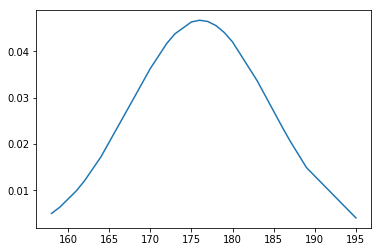

In [8]:
main()